<a href="https://colab.research.google.com/github/rajnishrajput12/MachineLearning/blob/master/ANN_Artificial_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import os
# from google.colab import drive
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from IPython.display import Image
# from sklearn import metrics
from ann_visualizer.visualize import ann_viz
from keras.utils.vis_utils import plot_model
# %matplotlib inline
import graphviz

In [0]:
##!pip install ann_visualizer

  Running setup.py bdist_wheel for ann-visualizer ... - done
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [0]:
'''
ANN or Artificial neural netowrk is the basic and most understandable neural network in deep learning
it consist of input layer, dense layers/layer and output layer
it is Feed forward neural network
uses:- we can use this in normal classification or regression with tabular data
for more explanation https://towardsdatascience.com/introduction-to-neural-networks-advantages-and-applications-96851bd1a207
https://www.youtube.com/watch?v=fv6Qll3laUU

'''

In [0]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
'''
this dataset has credit card defaulter and its transaction with many non-defaulter card hodler
we will be trying to build a model which will predict based on below feature whetehr the transaciton made was fraud or not
'''
data = pd.read_csv('/content/gdrive/My Drive/Churn_Modelling.csv',header=0)

In [0]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
data = pd.get_dummies(data=data,columns=['Geography','Gender'],drop_first=True)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [0]:
X = data[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain','Gender_Male']]
y = data['Exited']
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [0]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# initilizing ANN
classifier = Sequential()

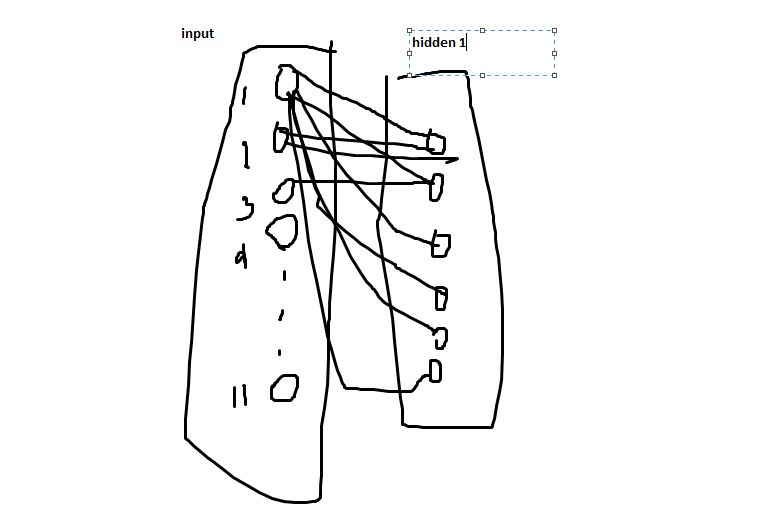

In [0]:
## adding input layter and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
Image(filename="/content/gdrive/My Drive/hiden1.PNG", width=700,height=400)

'''
the beolow picture denoted how our first layer with input layer will look like
'''

In [0]:
## adding second hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
## adding output layer as we haev two target so keeping untis =1 or only 1 node 
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [0]:
## compling ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
## fitting ANN 
classifier.fit(X_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
8000/8000 [==============================] - 1s 185us/step - loss: 0.4865 - acc: 0.7962
Epoch 2/10
8000/8000 [==============================] - 1s 114us/step - loss: 0.4307 - acc: 0.7965
Epoch 3/10
8000/8000 [==============================] - 1s 101us/step - loss: 0.4259 - acc: 0.7965
Epoch 4/10
8000/8000 [==============================] - 1s 109us/step - loss: 0.4205 - acc: 0.8105
Epoch 5/10
8000/8000 [==============================] - 1s 107us/step - loss: 0.4175 - acc: 0.8257
Epoch 6/10
8000/8000 [==============================] - 1s 107us/step - loss: 0.4150 - acc: 0.8295
Epoch 7/10
8000/8000 [==============================] - 1s 107us/step - loss: 0.4134 - acc: 0.8319
Epoch 8/10
8000/8000 [==============================] - 1s 107us/step - loss: 0.4117 - acc: 0.8330
Epoch 9/10
8000/8000 [==============================] - 1s 107us/step - loss: 0.4109 - acc: 0.8324
Epoch 10/10
8000/8000 [==============================] - 1s 100us/step - loss: 0.4098 - acc: 0.8341


In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
print(metrics.confusion_matrix(y_test,y_pred))

[[1561   30]
 [ 282  127]]


In [0]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
'''
note we dont have good recall which we should because this only will tell how many fraud trans we had TP/(TP+FN)
'''

0.844
0.3105134474327628


In [0]:
%matplotlib inline
plot_model(classifier, to_file='/content/gdrive/My Drive/model_plot.png', show_shapes=True, show_layer_names=True)


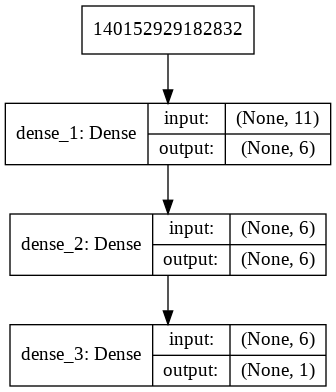

In [0]:
Image(filename="/content/gdrive/My Drive/model_plot.png", width=700,height=400)

In [0]:
"""
code to be appeneded to tune the model......
"""